In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df=pd.read_csv('0100val1ft.csv',delimiter=",")
df.head(5)

,location,SCRMSD,CARMSD,CHI1,SELFDIHED,SELFVDW,SELFELEC,SelfALL,MBDIHED,MBVDW,MBELEC,MBALL
0,LOW,1.153631,1.325141,-51.881355,0.651907,2.523383,20.251547,33.503959,0.377640,-11.113391,-5.697512,-14.855245
1,LOW,1.577676,1.108865,-55.229710,1.275343,2.216418,21.343843,34.027217,0.581738,-8.664580,-5.200302,-15.724896
2,LOW,1.274470,1.020357,-61.589970,0.645298,1.744053,21.457868,30.968461,0.155810,-11.826216,-6.000686,-16.761202
3,LOW,1.193524,0.924958,-58.549500,1.267476,1.457724,21.573995,33.366320,0.042535,-11.986884,-5.565793,-14.073723
4,LOW,0.920896,0.746715,-67.387482,0.939653,2.051272,19.523036,32.674128,0.073776,-11.359334,-5.591370,-16.054609


In [3]:
df['location'].nunique()

3

In [4]:
df.isnull().sum()

location     0
SCRMSD       0
CARMSD       0
CHI1         0
SELFDIHED    0
SELFVDW      0
SELFELEC     0
SelfALL      0
MBDIHED      0
MBVDW        0
MBELEC       0
MBALL        0
dtype: int64

In [5]:
enc=preprocessing.LabelEncoder()

df['location'] = enc.fit_transform(df['location'])
y = df[['location']]
x = df[df.columns[1:]]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)

In [7]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.3288230142402797

In [8]:
lm.score(X_test, y_test)

0.3454280302171473

In [9]:
        print("The linear model is: Y = {:.5} + {:.5}*cav1 + {:.5}*cav2 + {:.5}*cav3+ {:.5}*cav4".format(lm.intercept_[0], lm.coef_[0][0], lm.coef_[0][1], lm.coef_[0][2], lm.coef_[0][3]))

The linear model is: Y = 5.3105 + 0.17316*cav1 + -0.19608*cav2 + -0.00083269*cav3+ -0.026388*cav4


In [10]:
X = np.column_stack((df['SCRMSD'], df['CARMSD'], df['CHI1'],df['CHI2'],df['SELFDIHED'],df['SELFVDW'],df['SELFELEC'],df['SelfALL'],df['MBDIHED'],df['MBVDW'],df['MBELEC'],df['MBALL'],df['SCHBOND#']))
y = df['location']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

KeyError: 'CHI2'

In [ ]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
df.describe()

In [11]:
#Train and fit Logistic Regression model.
LoRmod=LogisticRegression(max_iter=10000)
LoRmod.fit(X_train,y_train)
#Score LR training
LoRmod.score(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5834313725490196

In [12]:
#Predict from manufactured test and score
LoRpred= LoRmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,LoRpred)*100)
print('F1 score:', f1_score(y_test, LoRpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, LoRpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, LoRpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, LoRpred))
print('Classification report:', classification_report(y_test, LoRpred))

Accuracy score: 58.90196078431372
F1 score: 56.21661834240884
Recall score: 57.336928463480795
Precision score: 56.29953272881719
Confusion matrix: [[440 156 116]
 [273 261 278]
 [ 75 150 801]]
Classification report:               precision    recall  f1-score   support

           0       0.56      0.62      0.59       712
           1       0.46      0.32      0.38       812
           2       0.67      0.78      0.72      1026

    accuracy                           0.59      2550
   macro avg       0.56      0.57      0.56      2550
weighted avg       0.57      0.59      0.57      2550



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [13]:
k_list=[]
for i in range(1,100):
  classifier=KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X_train,y_train)
  k_list.append(classifier.score(X_test,y_test))

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

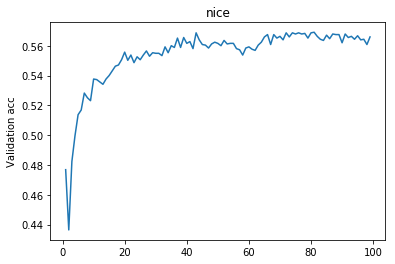

In [14]:
plt.plot(range(1,100),k_list)
plt.ylabel('Validation acc')
plt.title('nice')
plt.show()

In [15]:
KNNmod=KNeighborsClassifier(n_neighbors=30)
KNNmod.fit(X_train,y_train)
#Score RF fit.
KNNmod.score(X_train, y_train)

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.5958823529411764

In [16]:
#Predict from manufactured test and score
KNNpred = KNNmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,KNNpred)*100)
print('F1 score:', f1_score(y_test, KNNpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, KNNpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, KNNpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, KNNpred))
print('Classification report:', classification_report(y_test, KNNpred))

Accuracy score: 55.490196078431374
F1 score: 52.14844430138035
Recall score: 53.330801514814915
Precision score: 52.402448861752035
Confusion matrix: [[375 193 144]
 [261 232 319]
 [ 95 123 808]]
Classification report:               precision    recall  f1-score   support

           0       0.51      0.53      0.52       712
           1       0.42      0.29      0.34       812
           2       0.64      0.79      0.70      1026

    accuracy                           0.55      2550
   macro avg       0.52      0.53      0.52      2550
weighted avg       0.53      0.55      0.54      2550



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [17]:
SVCmod=SVC(kernel='rbf',gamma=0.1)
SVCmod.fit(X_train,y_train)
#Score DT fit.
SVCmod.score(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.702843137254902

In [18]:
gammalist=[]
for i in range(1,11):
    SVCmod=SVC(kernel='rbf',gamma=float(i/10))
    SVCmod.fit(X_train,y_train)
    gammalist.append(SVCmod.score(X_train, y_train))
    
print(gammalist)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.702843137254902, 0.7993137254901961, 0.8728431372549019, 0.9227450980392157, 0.9546078431372549, 0.9750980392156863, 0.9878431372549019, 0.9949019607843137, 0.9979411764705882, 0.9988235294117647]


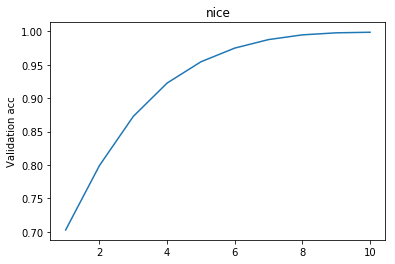

In [19]:
plt.plot(range(1,11),gammalist)
plt.ylabel('Validation acc')
plt.title('nice')
plt.show()

In [20]:
SVCmod=SVC(kernel='rbf',gamma=0.2)
SVCmod.fit(X_train,y_train)
#Score DT fit.
SVCmod.score(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7993137254901961

In [21]:
#Predict from manufactured test and score
SVCpred = SVCmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,SVCpred)*100)
print('F1 score:', f1_score(y_test, SVCpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, SVCpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, SVCpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, SVCpred))
print('Classification report:', classification_report(y_test, SVCpred))

Accuracy score: 55.607843137254896
F1 score: 52.98058277282326
Recall score: 53.69929129581311
Precision score: 52.98295205288716
Confusion matrix: [[373 208 131]
 [257 267 288]
 [100 148 778]]
Classification report:               precision    recall  f1-score   support

           0       0.51      0.52      0.52       712
           1       0.43      0.33      0.37       812
           2       0.65      0.76      0.70      1026

    accuracy                           0.56      2550
   macro avg       0.53      0.54      0.53      2550
weighted avg       0.54      0.56      0.54      2550



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [22]:
#Train and fit Random Forest model.
RFmod=RandomForestClassifier(n_estimators=100,random_state=77)
RFmod.fit(X_train,y_train)
#Score RF fit.
RFmod.score(X_train, y_train)

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.0

In [23]:
#Predict from manufactured test and score
RFpred = RFmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,RFpred)*100)
print('F1 score:', f1_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, RFpred))
print('Classification report:', classification_report(y_test, RFpred))

Accuracy score: 58.58823529411765
F1 score: 56.09561108427231
Recall score: 56.81528834283104
Precision score: 56.26819008245375
Confusion matrix: [[405 187 120]
 [242 289 281]
 [ 95 131 800]]
Classification report:               precision    recall  f1-score   support

           0       0.55      0.57      0.56       712
           1       0.48      0.36      0.41       812
           2       0.67      0.78      0.72      1026

    accuracy                           0.59      2550
   macro avg       0.56      0.57      0.56      2550
weighted avg       0.57      0.59      0.57      2550



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [24]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.3288230142402797

In [25]:
lm.score(X_test, y_test)

0.3454280302171473

In [26]:
#print("The linear model is: Y = {:.5} + {:.5}*x1 + {:.5}*x2 + {:.5}*x3+ {:.5}*cav4".format(lm.intercept_[0], lm.coef_[0][0], lm.coef_[0][1], lm.coef_[0][2], lm.coef_[0][3]))

In [ ]:
X = np.column_stack((df['SCRMSD'], df['CARMSD'], df['CHI1'],df['CHI2'],df['SELFDIHED'],df['SELFVDW'],df['SELFELEC'],df['SelfALL'],df['MBDIHED'],df['MBVDW'],df['MBELEC'],df['MBALL'],df['SCHBOND#']))
y = df['location']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
features_names = ['cav1', 'cav2','cav3','cav4']
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(svm.coef_[0]), features_names, top=10)

In [27]:
DTmod=DecisionTreeClassifier(criterion='gini', random_state = 77,max_depth=10)
DTmod.fit(X_train,y_train)
#Score DT fit.
DTmod.score(X_train, y_train)

0.7106862745098039

In [28]:
#Predict from manufactured test and score
DTpred = DTmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,DTpred)*100)
print('F1 score:', f1_score(y_test, DTpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, DTpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, DTpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, DTpred))
print('Classification report:', classification_report(y_test, DTpred))

Accuracy score: 54.509803921568626
F1 score: 52.636571653390476
Recall score: 52.99196320475302
Precision score: 52.52073558059025
Confusion matrix: [[368 223 121]
 [247 299 266]
 [128 175 723]]
Classification report:               precision    recall  f1-score   support

           0       0.50      0.52      0.51       712
           1       0.43      0.37      0.40       812
           2       0.65      0.70      0.68      1026

    accuracy                           0.55      2550
   macro avg       0.53      0.53      0.53      2550
weighted avg       0.54      0.55      0.54      2550



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


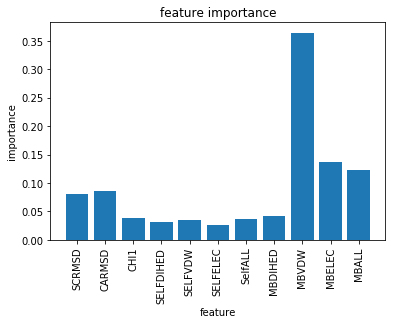

['SCRMSD', 'CARMSD', 'CHI1', 'SELFDIHED', 'SELFVDW', 'SELFELEC', 'SelfALL', 'MBDIHED', 'MBVDW', 'MBELEC', 'MBALL']


In [29]:
featurelist=list(df.columns[1:])
plt.bar(range(len(DTmod.feature_importances_)), DTmod.feature_importances_)
plt.xlabel("feature")
plt.ylabel("importance")
plt.title("feature importance")
plt.xticks(range(len(DTmod.feature_importances_)), featurelist,rotation='vertical')
plt.show()
print(featurelist)

In [30]:
#Train and fit Random Forest model.
RFmod=RandomForestClassifier(n_estimators=100,random_state=77)
RFmod.fit(X_train,y_train)
#Score RF fit.
RFmod.score(X_train, y_train)

/home/alia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.0

In [31]:
#Predict from manufactured test and score
RFpred = RFmod.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,RFpred)*100)
print('F1 score:', f1_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Recall score:', recall_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Precision score:', precision_score(y_test, RFpred,pos_label='positive',average='macro')*100)
print('Confusion matrix:', confusion_matrix(y_test, RFpred))
print('Classification report:', classification_report(y_test, RFpred))

Accuracy score: 58.58823529411765
F1 score: 56.09561108427231
Recall score: 56.81528834283104
Precision score: 56.26819008245375
Confusion matrix: [[405 187 120]
 [242 289 281]
 [ 95 131 800]]
Classification report:               precision    recall  f1-score   support

           0       0.55      0.57      0.56       712
           1       0.48      0.36      0.41       812
           2       0.67      0.78      0.72      1026

    accuracy                           0.59      2550
   macro avg       0.56      0.57      0.56      2550
weighted avg       0.57      0.59      0.57      2550



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


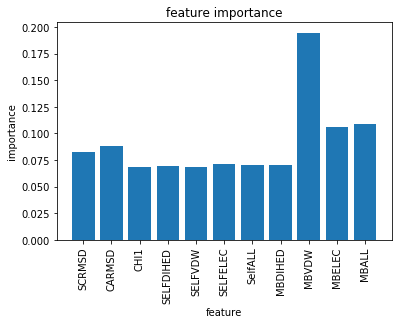

['SCRMSD', 'CARMSD', 'CHI1', 'SELFDIHED', 'SELFVDW', 'SELFELEC', 'SelfALL', 'MBDIHED', 'MBVDW', 'MBELEC', 'MBALL']


In [32]:
featurelist=list(df.columns[1:])
plt.bar(range(len(RFmod.feature_importances_)), RFmod.feature_importances_)
plt.xlabel("feature")
plt.ylabel("importance")
plt.title("feature importance")
plt.xticks(range(len(RFmod.feature_importances_)), featurelist,rotation='vertical')
plt.show()
print(featurelist)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

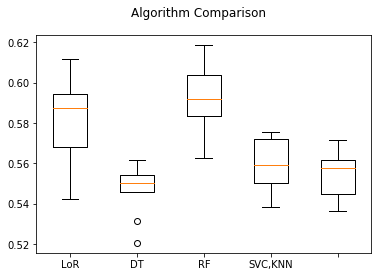

In [33]:
kfold = model_selection.KFold(n_splits=10, random_state=77)
cv_LoR = model_selection.cross_val_score(LogisticRegression(max_iter=10000), X_train, y_train, cv=kfold, scoring='accuracy')
cv_DT = model_selection.cross_val_score(DecisionTreeClassifier(criterion='gini', random_state = 77,max_depth=10), X_train, y_train, cv=kfold, scoring='accuracy')
cv_RF = model_selection.cross_val_score(RandomForestClassifier(n_estimators=100), X_train, y_train, cv=kfold, scoring='accuracy')
cv_SVC = model_selection.cross_val_score(SVC(kernel='rbf',gamma=0.2), X_train, y_train, cv=kfold, scoring='accuracy')
cv_KNN = model_selection.cross_val_score(KNeighborsClassifier(n_neighbors=60), X_train, y_train, cv=kfold, scoring='accuracy')
results=[cv_LoR,cv_DT, cv_RF,cv_SVC,cv_KNN]
names=["LoR","DT","RF","SVC,""KNN"]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()